## Visualize bounding boxes

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


## Plot one example
### Set paths

In [5]:
path_labels = "/usr/users/vogg/Labelling/Lemurs/Individual_imgs/labels_with_ids/"
path_images = "/usr/users/vogg/Labelling/Lemurs/Individual_imgs/eval/"

In [6]:
def plotBBox(img_id, img_path, label_path, ending = ".jpg"):
    """
    img_id: name of the image file (without ending)
    img_path: path to the images
    label_path: path to the labels
    ending: type of image .jpg, .png, .JPG
    """
    coords = pd.read_csv(label_path + img_id + ".txt", header = None, 
                       sep = " ")
    print(coords)
    im = cv2.imread(img_path + img_id + ending)
    
    im_h, im_w = im.shape[:2]

    for i in range(len(coords)):
        center = tuple(map(int, (im_w * coords.iloc[i, 2], im_h * coords.iloc[i, 3])))
        low_left = tuple(map(int, (im_w * (coords.iloc[i, 2] - coords.iloc[i, 4]/2),
                                   im_h * (coords.iloc[i, 3] - coords.iloc[i, 5]/2))))
        up_right = tuple(map(int, (im_w * (coords.iloc[i, 2] + coords.iloc[i, 4]/2), 
                                 im_h * (coords.iloc[i, 3] + coords.iloc[i, 5]/2))))

        color = (i * 100 % 255, i * 75 % 255, i * 50 % 255)
        im = cv2.circle(im, center, radius = 2, color = color, thickness = 5)
        im = cv2.rectangle(im, low_left, up_right, color = color, thickness = 5)
        
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    
    plt.show()

   0  1         2         3         4         5  6
0  0  0  0.416667  0.613889  0.060833  0.126918  2


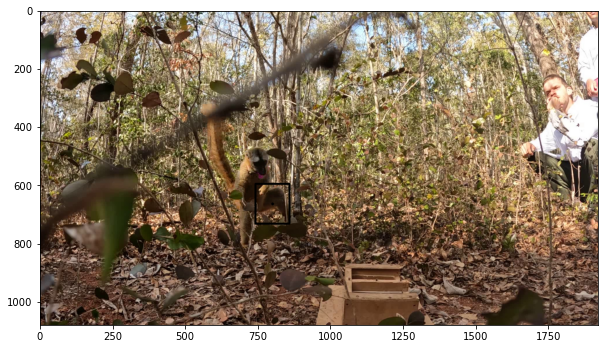

In [16]:
plotBBox('GX020115_small_1276', path_images, path_labels)

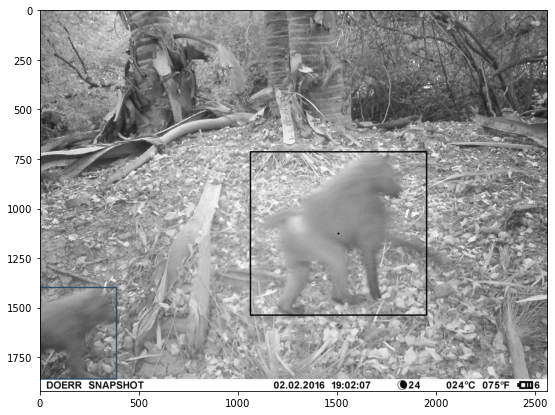

In [5]:

plotBBox('IMAG0034%20-%202015%20-%20jan%20-%20ct3', 
         '/usr/users/vogg/Labelling/Baboons/images/',
        '/usr/users/vogg/Labelling/Baboons/labels_with_ids/',
        '.JPG')
